# House Prices - Part I

I will use the kaggle dataset fo house prices to study use of Python and JupyterLab.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

This part will focus on knowledge the dataset and make some descriptive analysis: univariate analysis.


In [186]:
# Import libraries
# all starts with pandas and numpy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import chart_studio.plotly
import seaborn as sns

import time


In [6]:
#import raw data
df = pd.read_csv('train.csv')


In [101]:
# Options data visualization on Pandas
# See all columns and 20 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# set histogram with grid
sns.set(style="whitegrid")

## Let's know the dataset

I will use describe techniques to know better the dataset


In [11]:
# how many lines and columns
df.shape


(1460, 81)

In [20]:
# how the size of dataset
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

## Ok!
Some features have a few number os observations. We need take beware with:
1. Alley
2. FareplaceQual
3. PoolQC
4. Fence
5. MiscFeature


In [30]:
# Sample of data to see
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Univariate stats

Use univariate statisticas to know numeric variables.


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [193]:
df.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Make histograms of numeric variables.

In [219]:
# A function to make histogram
def descritiva(nome: str) -> None:
    
    print("\n") 
    print('\x1b[1;31m' + "Descriptive Analytis of %s" %(nome) + '\x1b[0m')
    print("\n")
        
    # Summary
    aux = df[nome].describe()
    print(aux)

    
    # histogram
    print("\n") 
    print('\x1b[1;31m' + "Histogram of %s" %(nome) + '\x1b[0m')
    
    plt.hist(df[nome], color=['blue'])
    plt.xlabel(nome)
    plt.ylabel("Frequency")
    plt.title('Histogram of %s' %(nome))
    plt.show()
    
    # box-plot
    print("\n") 
    print('\x1b[1;31m' + "Box-Plot %s" %(nome) + '\x1b[0m')

    sns.boxplot(x=nome, data=df)
    print("\n")    

    
    



Descriptive Analytis of SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Histogram of SalePrice


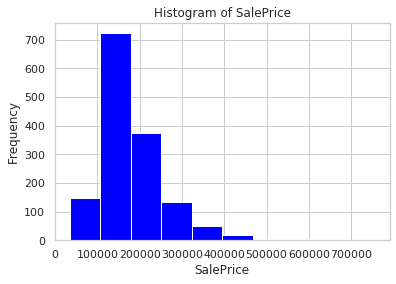



Box-Plot SalePrice




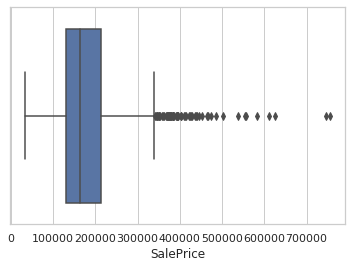

In [220]:
descritiva(nome='SalePrice')

## Response Variable Sales Price

The response variable Sales Price have a no simetric view. Probably will be hard to adjust prices for high price houses. The right side of distribution.

I have problems with outliers.




Descriptive Analytis of MSSubClass


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


Histogram of MSSubClass


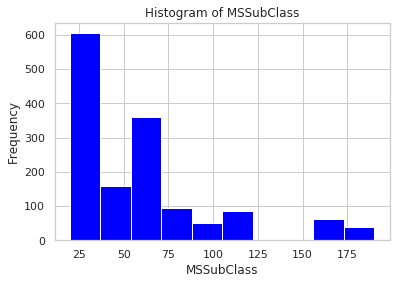



Box-Plot MSSubClass




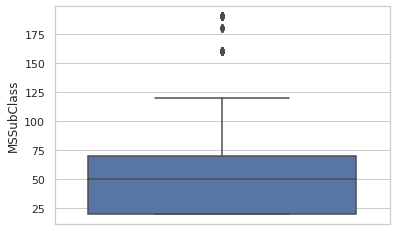

In [164]:
descritiva(nome='MSSubClass')



Descriptive Analytis of LotFrontage


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


Histogram of LotFrontage


/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


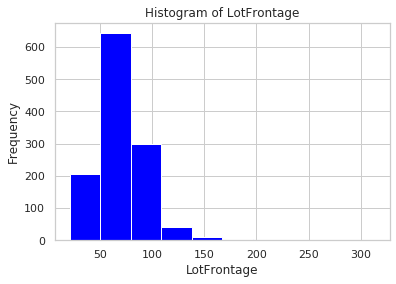



Box-Plot LotFrontage




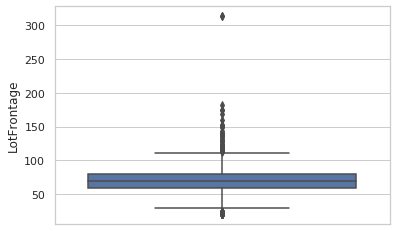

In [194]:
descritiva(nome='LotFrontage')



Descriptive Analytis of LotArea


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


Histogram of LotArea


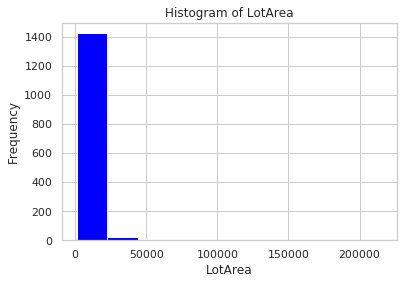



Box-Plot LotArea




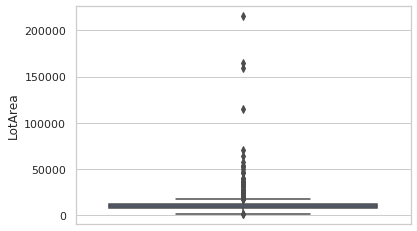

In [166]:
descritiva(nome='LotArea')



Descriptive Analytis of OverallQual


count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


Histogram of OverallQual


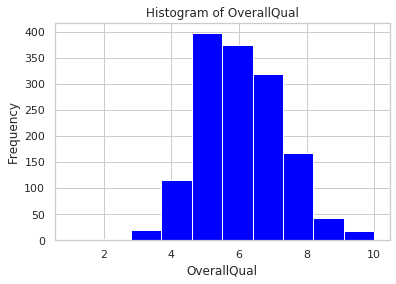



Box-Plot OverallQual




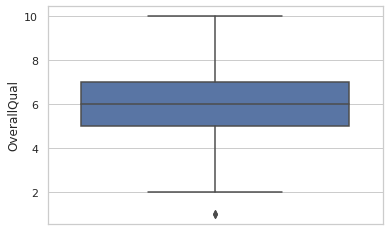

In [167]:
descritiva(nome='OverallQual')



Descriptive Analytis of OverallCond


count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


Histogram of OverallCond


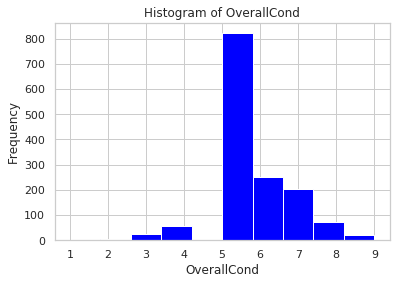



Box-Plot OverallCond




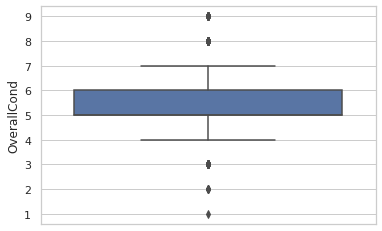

In [168]:
descritiva(nome='OverallCond')



Descriptive Analytis of YearBuilt


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


Histogram of YearBuilt


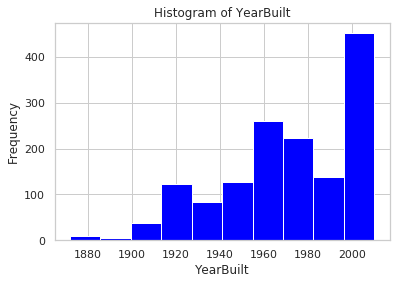



Box-Plot YearBuilt




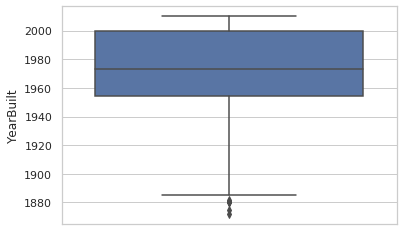

In [169]:
descritiva(nome='YearBuilt')



Descriptive Analytis of MasVnrArea


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Histogram of MasVnrArea


/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


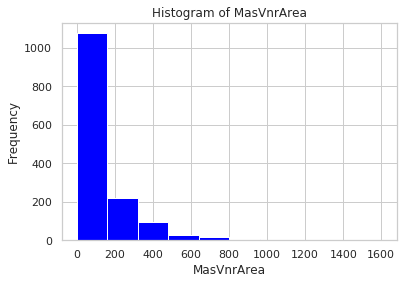



Box-Plot MasVnrArea




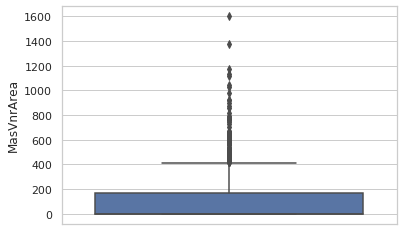

In [170]:
descritiva(nome='MasVnrArea')



Descriptive Analytis of BsmtFinSF1


count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


Histogram of BsmtFinSF1


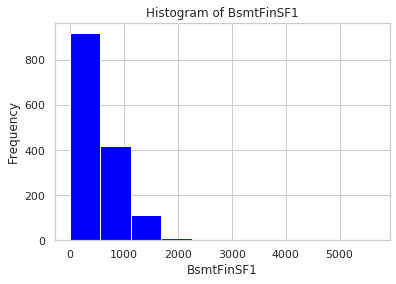



Box-Plot BsmtFinSF1




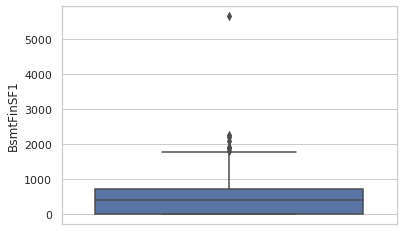

In [171]:
descritiva(nome='BsmtFinSF1')



Descriptive Analytis of BsmtFinSF2


count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


Histogram of BsmtFinSF2


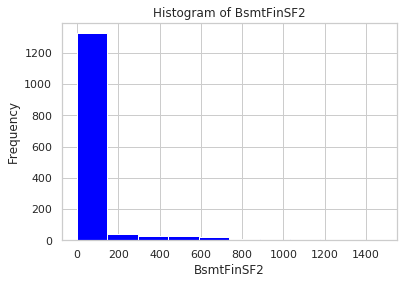



Box-Plot BsmtFinSF2




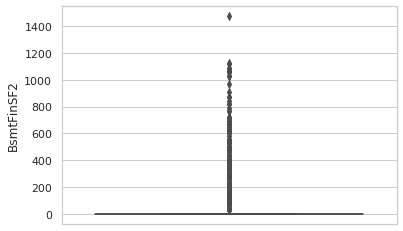

In [191]:
descritiva(nome='BsmtFinSF2')



Descriptive Analytis of BsmtUnfSF


count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


Histogram of BsmtUnfSF


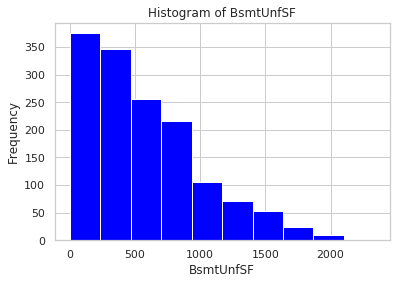



Box-Plot BsmtUnfSF




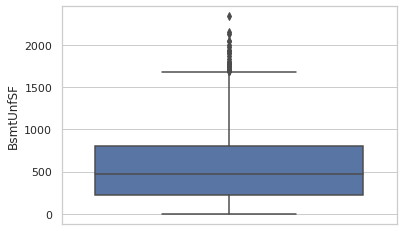

In [192]:
descritiva(nome='BsmtUnfSF')



Descriptive Analytis of TotalBsmtSF


count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


Histogram of TotalBsmtSF


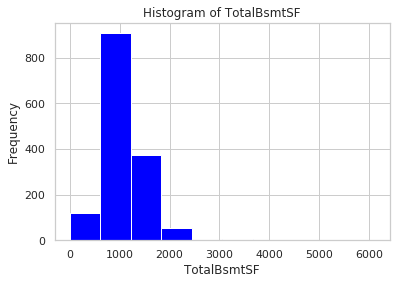



Box-Plot TotalBsmtSF




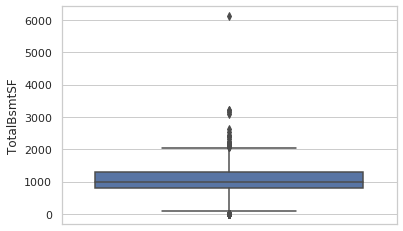

In [195]:
descritiva(nome='TotalBsmtSF')



Descriptive Analytis of 1stFlrSF


count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


Histogram of 1stFlrSF


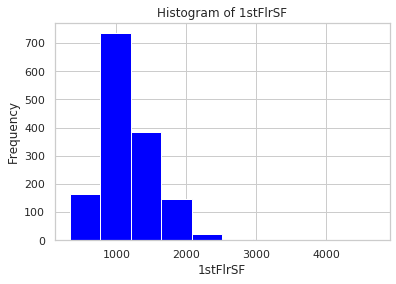



Box-Plot 1stFlrSF




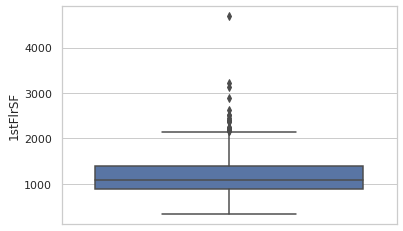

In [196]:
descritiva(nome='1stFlrSF')



Descriptive Analytis of 2ndFlrSF


count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


Histogram of 2ndFlrSF


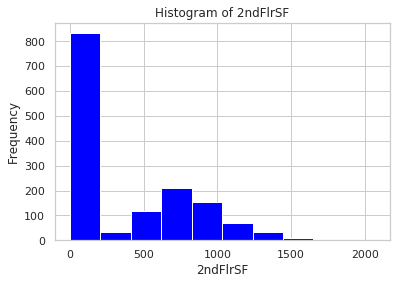



Box-Plot 2ndFlrSF




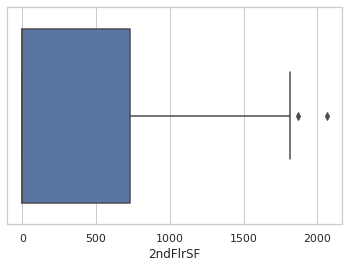

In [222]:
descritiva(nome='2ndFlrSF')



Descriptive Analytis of LowQualFinSF


count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


Histogram of LowQualFinSF


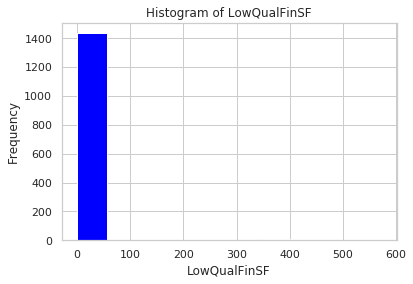



Box-Plot LowQualFinSF




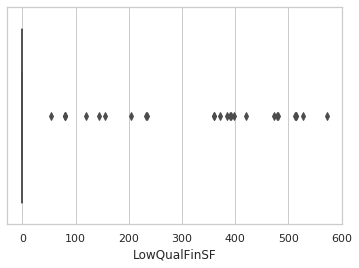

In [223]:
descritiva(nome='LowQualFinSF')



Descriptive Analytis of GrLivArea


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


Histogram of GrLivArea


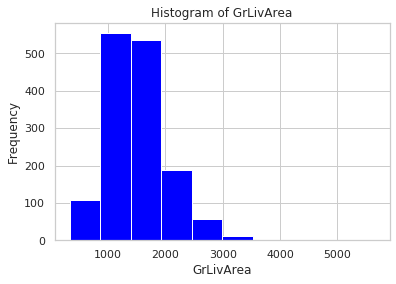



Box-Plot GrLivArea




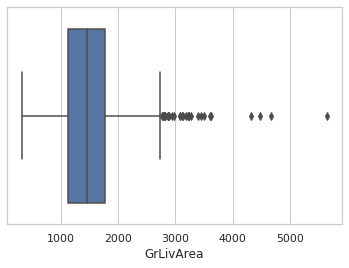

In [224]:
descritiva(nome='GrLivArea')



Descriptive Analytis of BsmtFullBath


count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


Histogram of BsmtFullBath


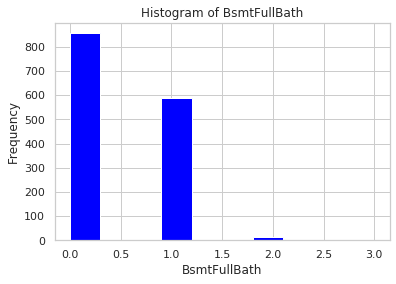



Box-Plot BsmtFullBath




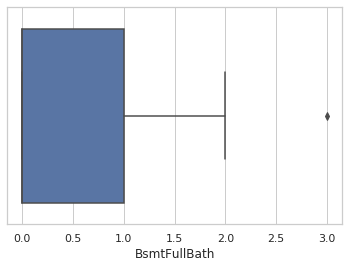

In [225]:
descritiva(nome='BsmtFullBath')



Descriptive Analytis of BsmtHalfBath


count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


Histogram of BsmtHalfBath


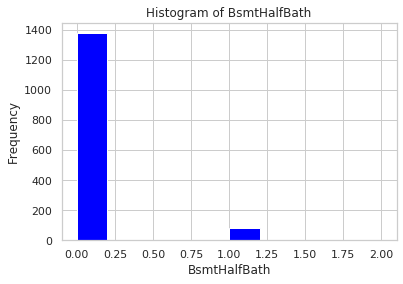



Box-Plot BsmtHalfBath




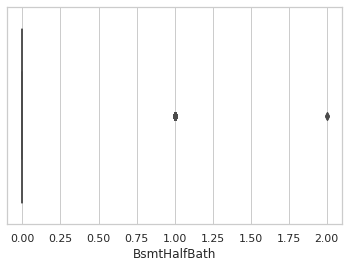

In [226]:
descritiva(nome='BsmtHalfBath')



Descriptive Analytis of FullBath


count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


Histogram of FullBath


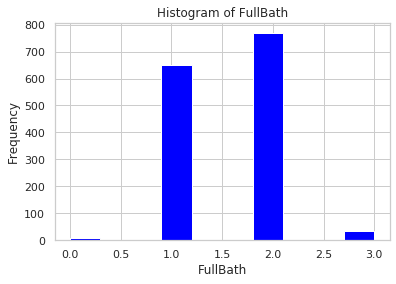



Box-Plot FullBath




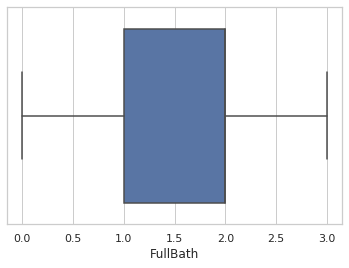

In [227]:
descritiva(nome='FullBath')



Descriptive Analytis of HalfBath


count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


Histogram of HalfBath


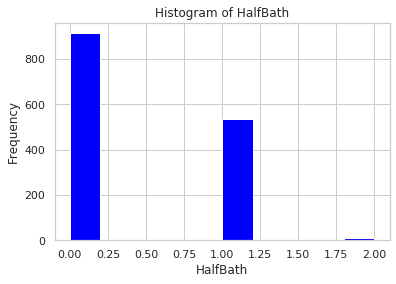



Box-Plot HalfBath




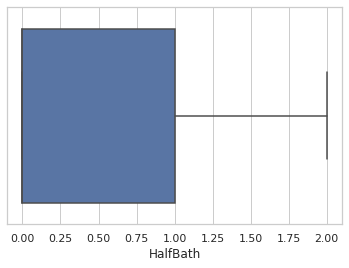

In [228]:
descritiva(nome='HalfBath')



Descriptive Analytis of BedroomAbvGr


count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


Histogram of BedroomAbvGr


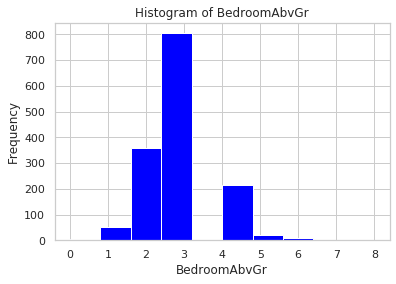



Box-Plot BedroomAbvGr




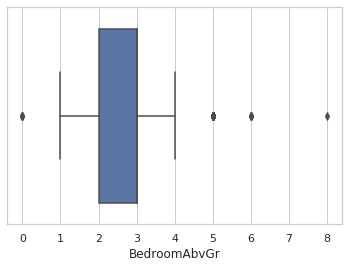

In [229]:
descritiva(nome='BedroomAbvGr')



Descriptive Analytis of KitchenAbvGr


count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


Histogram of KitchenAbvGr


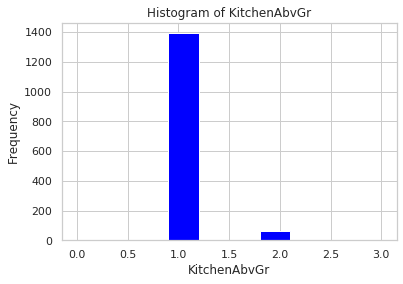



Box-Plot KitchenAbvGr




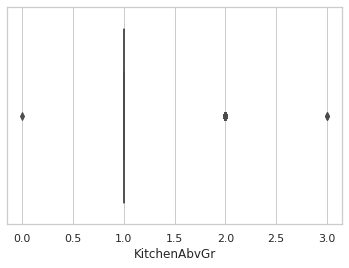

In [230]:
descritiva(nome='KitchenAbvGr')



Descriptive Analytis of TotRmsAbvGrd


count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


Histogram of TotRmsAbvGrd


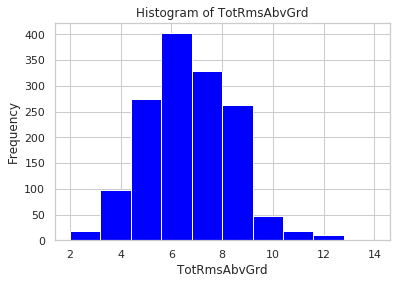



Box-Plot TotRmsAbvGrd




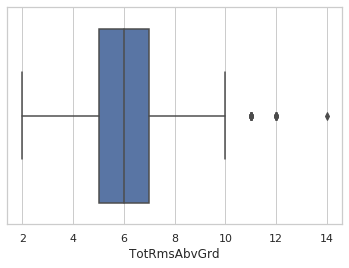

In [231]:
descritiva(nome='TotRmsAbvGrd')



Descriptive Analytis of Fireplaces


count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


Histogram of Fireplaces


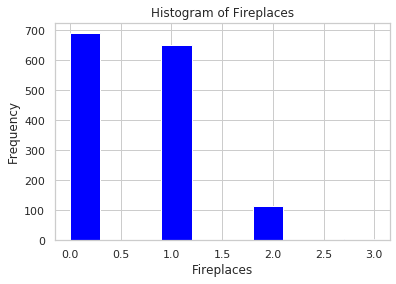



Box-Plot Fireplaces




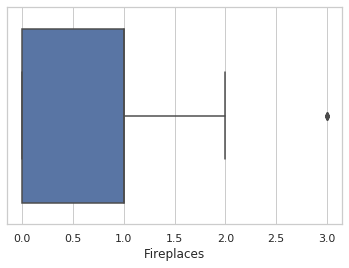

In [232]:
descritiva(nome='Fireplaces')



Descriptive Analytis of GarageYrBlt


count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


Histogram of GarageYrBlt


/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/afonso/projects/env/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


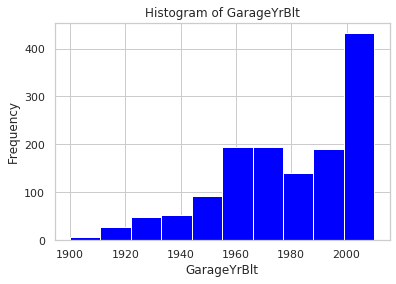



Box-Plot GarageYrBlt




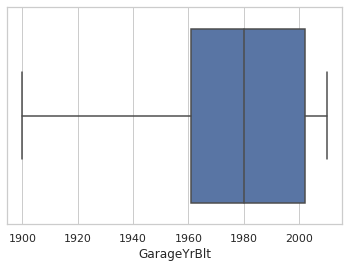

In [233]:
descritiva(nome='GarageYrBlt')



Descriptive Analytis of GarageCars


count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


Histogram of GarageCars


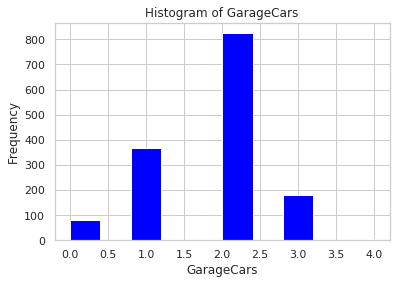



Box-Plot GarageCars




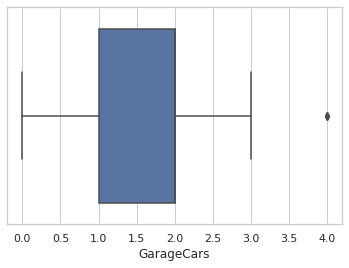

In [234]:
descritiva(nome='GarageCars')



Descriptive Analytis of GarageArea


count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


Histogram of GarageArea


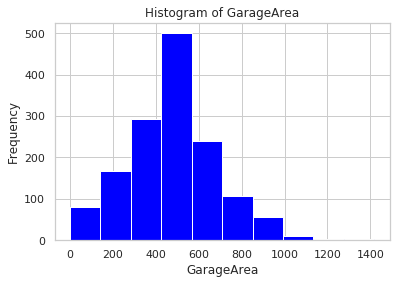



Box-Plot GarageArea




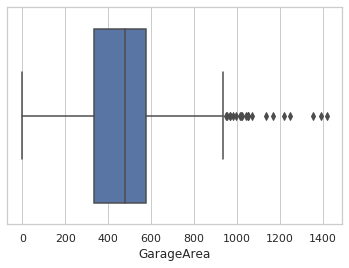

In [235]:
descritiva(nome='GarageArea')



Descriptive Analytis of WoodDeckSF


count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


Histogram of WoodDeckSF


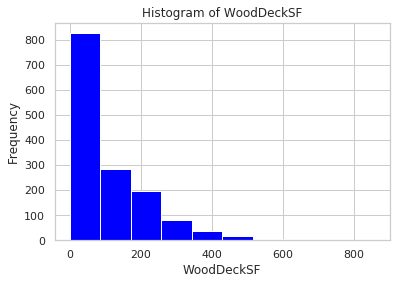



Box-Plot WoodDeckSF




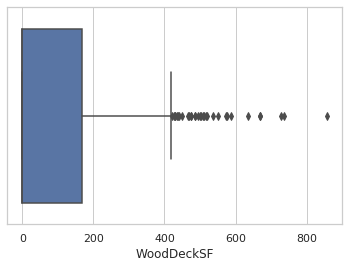

In [236]:
descritiva(nome='WoodDeckSF')



Descriptive Analytis of OpenPorchSF


count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


Histogram of OpenPorchSF


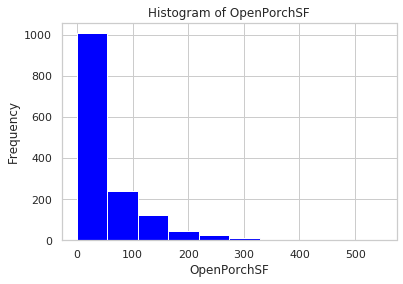



Box-Plot OpenPorchSF




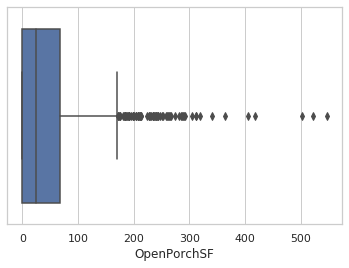

In [237]:
descritiva(nome='OpenPorchSF')



Descriptive Analytis of EnclosedPorch


count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


Histogram of EnclosedPorch


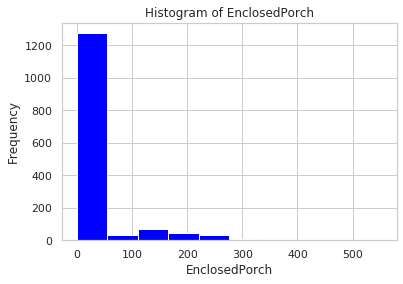



Box-Plot EnclosedPorch




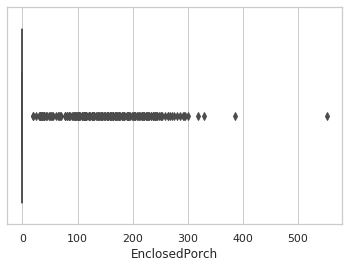

In [238]:
descritiva(nome='EnclosedPorch')



Descriptive Analytis of 3SsnPorch


count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


Histogram of 3SsnPorch


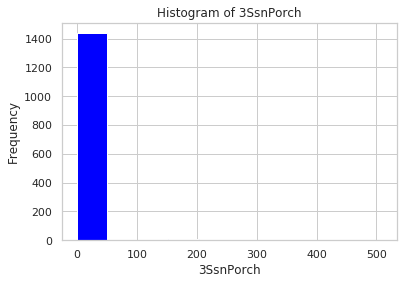



Box-Plot 3SsnPorch




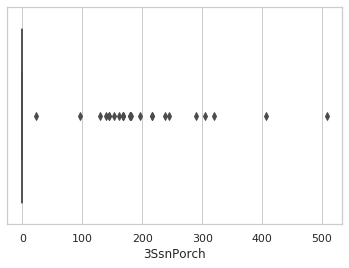

In [239]:
descritiva(nome='3SsnPorch')



Descriptive Analytis of ScreenPorch


count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


Histogram of ScreenPorch


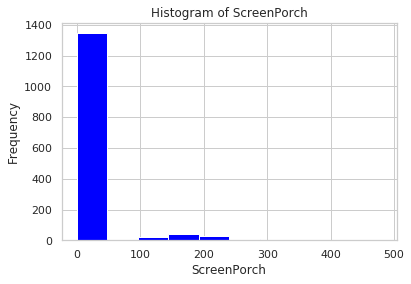



Box-Plot ScreenPorch




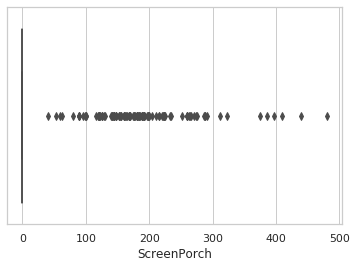

In [240]:
descritiva(nome='ScreenPorch')



Descriptive Analytis of PoolArea


count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


Histogram of PoolArea


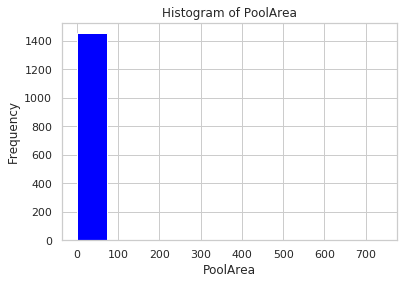



Box-Plot PoolArea




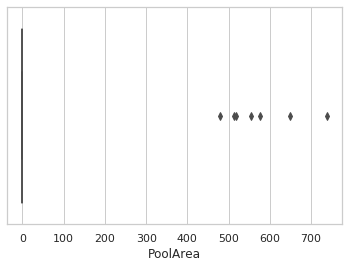

In [241]:
descritiva(nome='PoolArea')



Descriptive Analytis of MiscVal


count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


Histogram of MiscVal


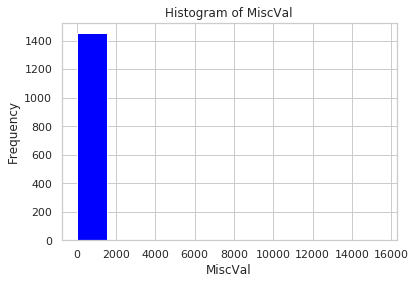



Box-Plot MiscVal




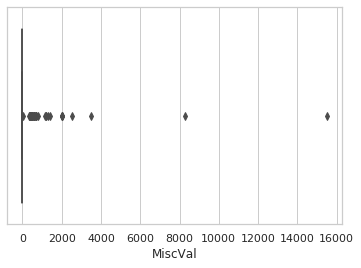

In [242]:
descritiva(nome='MiscVal')



Descriptive Analytis of MoSold


count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


Histogram of MoSold


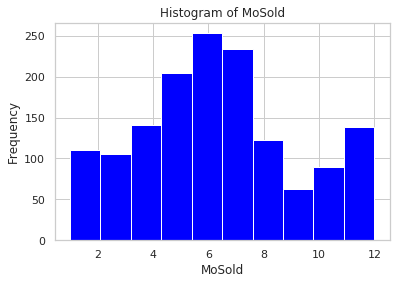



Box-Plot MoSold




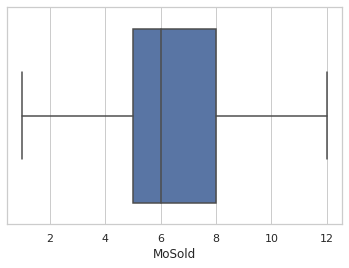

In [243]:
descritiva(nome='MoSold')



Descriptive Analytis of YrSold


count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


Histogram of YrSold


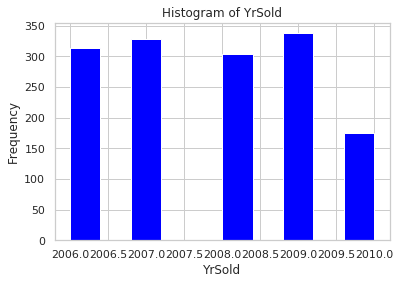



Box-Plot YrSold




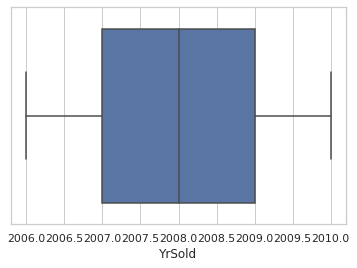

In [244]:
descritiva(nome='YrSold')